# Importing Libraries
### 1. Install all applicable libraries you will need (e.g., Pandas, NumPy, etc.) 

In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #This library is built on matplotlib with enhanced graphing capabilities
from statsmodels.tsa.stattools import adfuller #adding this library to conduct adfuller tests
from statsmodels.tsa.stattools import acf
from numpy import log

import sys

C:\Users\joakh\AppData\Local\Temp\ipykernel_14616\501174087.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Exploration and preparation
### 2. Download 10 years of weekly US Regular Conventional Gas Price (GASREGCOVW.csv) data 
(Dollars per Gallon) from https://fred.stlouisfed.org/series/GASREGCOVW from 02/12/2014 to 
02/12/2024
### 3. Import the weekly gas price data into your notebook/workspace as a data framework (e.g., df).

In [2]:
# df = pd.read_csv(r"C:\Users\joakh\OneDrive\IE 592 Case Studies\GASREGCOVW.csv")
df = pd.read_csv(r"c:\Users\joakh\Documents\SIUE\Spring 2024 Industrial Engineering\IE 592\GASREGCOVW.csv")

### 4. Display the number of rows and columns in the data. 

In [3]:
df.shape

(522, 2)

### 5. Display the five rows of the dataset to confirm that the import was successful. 

In [4]:
df.head(5)

,DATE,GASREGCOVW
0,2014-02-17,3.326
1,2014-02-24,3.394
2,2014-03-03,3.421
3,2014-03-10,3.452
4,2014-03-17,3.489


### 6. Identify if there are missing/null values and display number of missing values per column. Remove missing values, if any. 

In [5]:
df.isnull().sum()

DATE          0
GASREGCOVW    0
dtype: int64

### 7. Identify if there are duplicated observations. Remove duplicate values, if any. 

In [6]:
duplicateRows = df[df.duplicated()]
duplicateRows

,DATE,GASREGCOVW


* No Duplicate

### 8. Set column ‘DATE’ as datetime format. 

In [7]:
df['DATE']=pd.to_datetime(df['DATE'])
df['DATE']

0     2014-02-17
1     2014-02-24
2     2014-03-03
3     2014-03-10
4     2014-03-17
         ...    
517   2024-01-15
518   2024-01-22
519   2024-01-29
520   2024-02-05
521   2024-02-12
Name: DATE, Length: 522, dtype: datetime64[ns]

### 9. Set ‘DATE’ as index in your data frame. 

In [8]:
# df.set_index('DATE', inplace=True)
# df.info()
df.set_index('DATE', inplace=True)
df

,GASREGCOVW
DATE,
2014-02-17,3.326
2014-02-24,3.394
2014-03-03,3.421
2014-03-10,3.452
2014-03-17,3.489
...,...
2024-01-15,2.944
2024-01-22,2.950
2024-01-29,2.979


# Data Preparation/Cleaning and descriptive analysis

### 10. Estimate the descriptive statistics (count, mean, standard deviation, p0, p25, p50, p75, p100) for the gas price. 
* Describe the results observed in the notebook as markdown text. 

In [9]:
df.describe()

,GASREGCOVW
count,522.000000
mean,2.732144
std,0.620936
min,1.638000
25%,2.237250
50%,2.587500
75%,3.202750
max,4.844000


* The dataset consists of 522 data points. The average is 2.73, and the deviation is 0.62. The smallest value is 1.64, while the largest value is 4.84. The 25th percentile is 2.24, while the median (50th percentile) is 2.59. The 75th percentile is 3.20.

Overall, the data set exhibits considerable distribution, with values spanning from 1.64 to 4.84. The data is centered around 2.73, with the majority of results ranging from 2.24 to 3.20.

### 11. Create the box-plot the weekly gas price (GASREGCOVW). Describe the results observed in the notebook as markdown text. 

Text(0.5, 1.0, 'GAS Price')

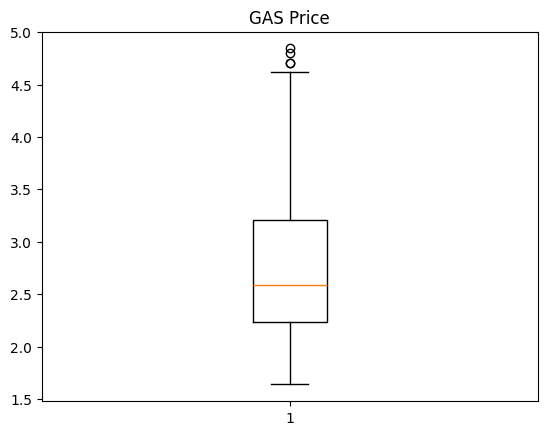

In [10]:
# Box Plots
subset = df[['GASREGCOVW']]

plt.boxplot(subset)

# Adding title
plt.title("GAS Price")

* *The box plot indicates that the price is within the interquartile range of our data set. We have identified outliers in the price attribute of the data that need to be investigated further to understand the reasons for their presence.*

### 12. Plot the scatter/line plot for the weekly gas price (GASREGCOVW). Describe the results observed in the notebook as markdown text. 

In [11]:
price_week_mean = df.groupby('DATE')["GASREGCOVW"].mean()
price_week_mean

DATE
2014-02-17    3.326
2014-02-24    3.394
2014-03-03    3.421
2014-03-10    3.452
2014-03-17    3.489
              ...  
2024-01-15    2.944
2024-01-22    2.950
2024-01-29    2.979
2024-02-05    3.021
2024-02-12    3.083
Name: GASREGCOVW, Length: 522, dtype: float64

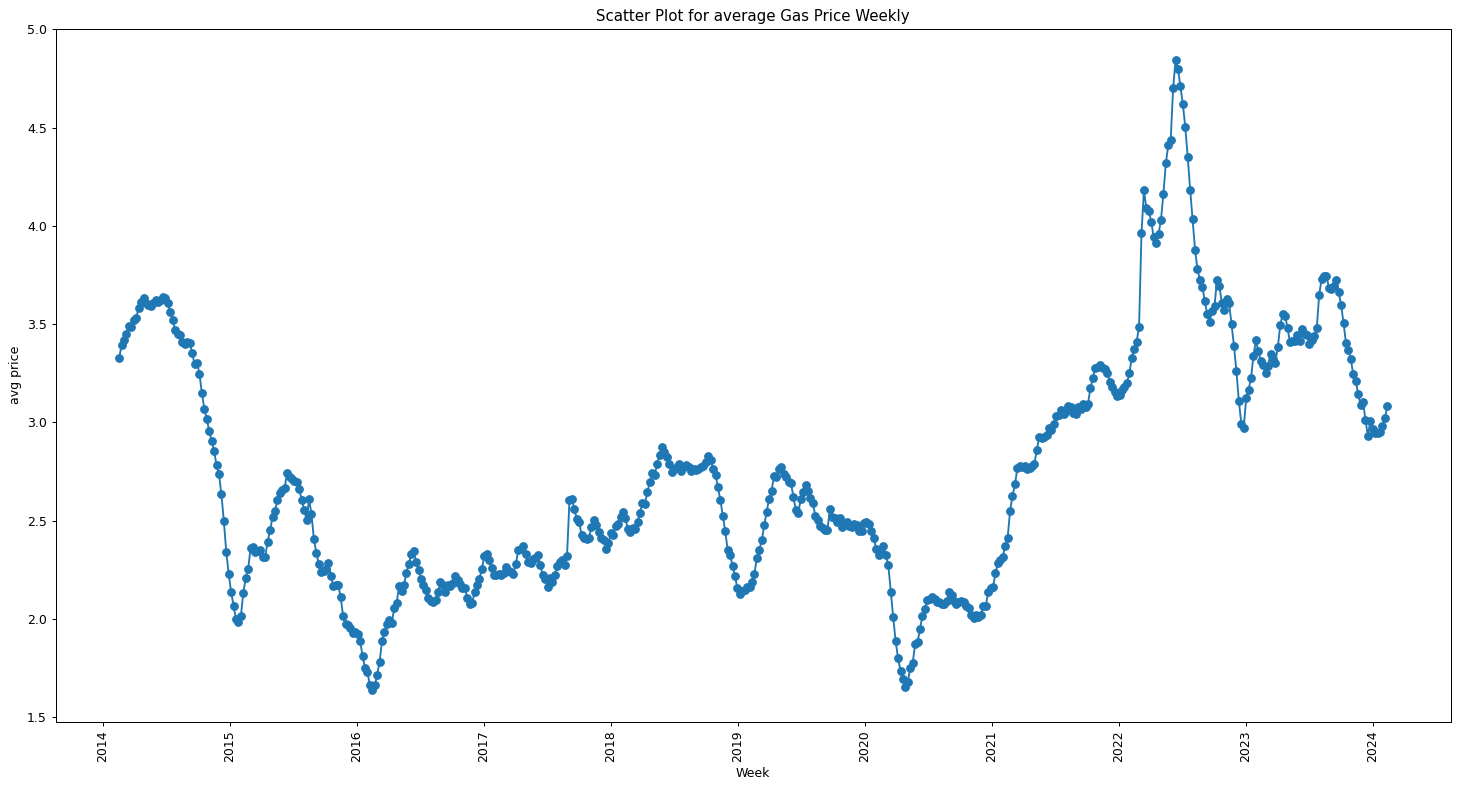

In [12]:
x = price_week_mean.index
y = price_week_mean

plt.figure(figsize=(20, 10), dpi=90)
plt.plot(x, y)
plt.scatter(x, y)

plt.title("Scatter Plot for average Gas Price Weekly")
plt.xlabel("Week")
plt.ylabel("avg price")
plt.xticks(rotation=90)
plt.show()

* The line graph displays the weekly average gas price in the United States. The x-axis displays the year, while the y-axis represents the average petrol price in dollars per gallon. The graph features a blue line representing the average gas price trend over time.

* The graph shows a consistent rise in the average gas price in the United States starting from 2014. The average petrol price in 2014 was $2.04 per gallon. The average petrol price in 2023 was $3.49 per gallon.


* The graph illustrates a seasonal pattern in the average gas price, with higher costs during summer months and lower prices during winter months. In 2023, the average gas price was $4.20 per gallon in June and $2.99 per gallon in December. Overall, the average gas price trend is increasing.

* In June 2022, there was a spike in the price, followed by a modest decrease by the end of 2023, and a steady decline by the end of the year. In 2024, there are signs of a bullish trend.


### 13. In June 2022, the highest gas price per gallon was observed, does this align with your findings? research and provide the reason for this gas price increase. 

In June 2022, the United States saw the highest average gas prices on record, peaking at aboyt $5.00 per gallon. Multiple causes led to this substantial rise:

1. Global Crude Oil Price Increases: The primary factor was the significant surge in global crude oil prices, driven by:

    * Epidemic, there was a significant increase in the demand for oil when economies       reopened, surpassing levels seen before the outbreak.
    * Geopolitical conflicts, like the war in Ukraine, have impacted oil production and transportation, leading to supply chain disruptions.
    OPEC and its partners, known as OPEC+, decreased output to sustain elevated prices.

2. Refineries and Gasoline Supply Limitations:

    * Insufficient refining capacity: American refineries faced challenges meeting the rising demand for gasoline, resulting in a lack of supplies.
    During the summer driving season, there was a rise in gas usage which worsened the supply-demand mismatch.

3. Additional Variables:

    * Taxes and restrictions in specific states contribute to the ultimate cost at the pump.
    Speculation in the oil market also had a role in price fluctuations.
    The convergence of these variables led to a surge in gas prices to unprecedented levels in June 2022. Although costs have decreased from their peak during the pandemic, they are still considerably elevated compared to pre-pandemic levels since many of the contributing causes are still present.

# Time Series Forecasting using Moving Average (MA)

* Create new dataframe with GASREGCOVW as target variable and index Date

In [14]:
close = df['GASREGCOVW']
close

DATE
2014-02-17    3.326
2014-02-24    3.394
2014-03-03    3.421
2014-03-10    3.452
2014-03-17    3.489
              ...  
2024-01-15    2.944
2024-01-22    2.950
2024-01-29    2.979
2024-02-05    3.021
2024-02-12    3.083
Name: GASREGCOVW, Length: 522, dtype: float64

### 14. Estime the Simple Moving Average (SMA) using a rolling window of 5 weeks

In [15]:
sma_5=close.rolling(window=5).mean()
sma_5

DATE
2014-02-17       NaN
2014-02-24       NaN
2014-03-03       NaN
2014-03-10       NaN
2014-03-17    3.4164
               ...  
2024-01-15    2.9582
2024-01-22    2.9620
2024-01-29    2.9568
2024-02-05    2.9678
2024-02-12    2.9954
Name: GASREGCOVW, Length: 522, dtype: float64

### 15. Estime the Cumulative Moving Average (CMA) using a expanding window of 5 weeks (i.e, cma_5) 

In [16]:
cma_5 = close.expanding(min_periods=5).mean()
cma_5

DATE
2014-02-17         NaN
2014-02-24         NaN
2014-03-03         NaN
2014-03-10         NaN
2014-03-17    3.416400
                ...   
2024-01-15    2.730012
2024-01-22    2.730435
2024-01-29    2.730913
2024-02-05    2.731470
2024-02-12    2.732144
Name: GASREGCOVW, Length: 522, dtype: float64

### 16. Estime the Exponential Moving Average (EMA) using a span window of 5 weeks (i.e, ema_5) 

In [17]:
ema_5 = close.ewm(span=5,adjust=False).mean()
ema_5

DATE
2014-02-17    3.326000
2014-02-24    3.348667
2014-03-03    3.372778
2014-03-10    3.399185
2014-03-17    3.429123
                ...   
2024-01-15    2.975477
2024-01-22    2.966984
2024-01-29    2.970990
2024-02-05    2.987660
2024-02-12    3.019440
Name: GASREGCOVW, Length: 522, dtype: float64

### 17. Create the plot for GASREGCOVW with SMA_5 & CMA_5 & EMA_5 

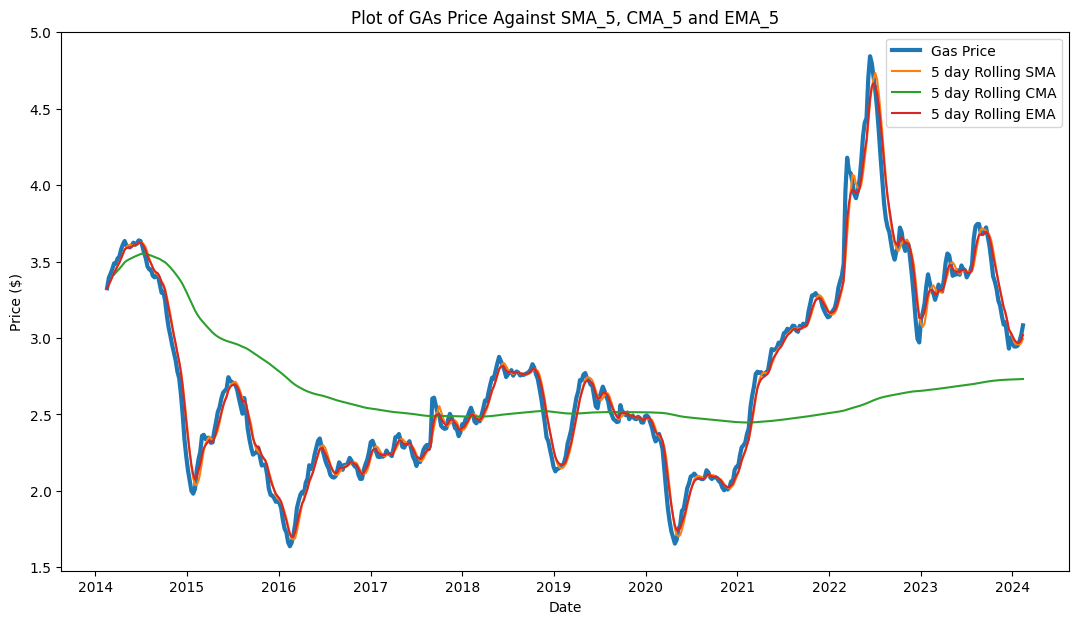

In [18]:
#Our Chart size
plt.figure(figsize = (13,7))

#Plotting 'Price of Gas' and SMA_5, CMA_5 and EMA_5 lines
plt.plot(close,label='Gas Price',linewidth=3)
plt.plot(sma_5,label='5 day Rolling SMA',linewidth=1.5)
plt.plot(cma_5,label='5 day Rolling CMA',linewidth=1.5)
plt.plot(ema_5,label='5 day Rolling EMA',linewidth=1.5)

#Adding title, labels on the axis:
#Legend on the left-upper corner
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Plot of GAs Price Against SMA_5, CMA_5 and EMA_5')
plt.legend()


### 18. Create the plot for GASREGCOVW with SMA_5 & CMA_5 & EMA_5 ('zooming' on dates between 01/30/2023 and 02/12/2024) 

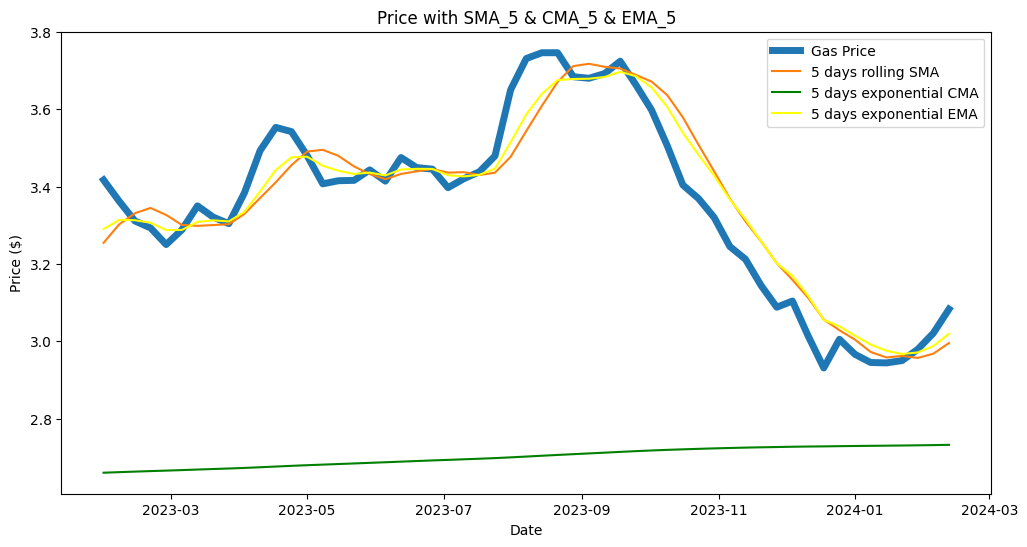

In [19]:
start='2023-01-30'
end='2024-02-12'

plt.figure(figsize = (12,6))
# Plot for GASREGCOVW with SMA_5 & CMA_5 & EMA_5:
plt.plot(close[start:end], label='Gas Price', linewidth = 5)
plt.plot(sma_5[start:end], label='5 days rolling SMA', linewidth = 1.5)
plt.plot(cma_5[start:end], label='5 days exponential CMA', linewidth = 1.5,color='green')
plt.plot(ema_5[start:end], label='5 days exponential EMA', linewidth = 1.5,color='yellow')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price with SMA_5 & CMA_5 & EMA_5')
plt.legend()
plt.show()

### 19. Visually, Which MA provided better predictions? Which method would you recommend to your client for their predictions? 

* *Observing the chart, the EMA (yellow line) closely follows the price fluctuations compared to the SMA (red line) and CMA (green line). This is due to the fact that the Exponential Moving Average (EMA) places greater emphasis on recent prices. Yet, the EMA may exhibit increased volatility, particularly when experiencing swift price fluctuations.* 

* *The optimal moving average will vary based on individual trading objectives and risk tolerance. When seeking a long-term trending aim for my customer, using both Simple Moving Average (SMA) and Exponential Moving Average (EMA) might be a suitable option.Upon detailed examination of the chart, it is evident that when the Exponential Moving Average (EMA) crosses the Simple Moving Average (SMA), it signals a potential shift in the market trend. This can serve as a reliable indicator to initiate long (bullish) or short (bearish) positions.*

# [Extra Credit] Estimate the MAPE and RSME for SMA_5 and EMA_5 and determine which method produces better performance. Use 98% of the data for training and 2% for testing (or future predictions ) 

In [20]:
data_len = len(close)
train_len = round(data_len*0.98)
test_len = data_len - round(data_len*0.98)
print("number of obs for the data:", data_len)
print("number of obs for the train (90%):", train_len)
print("number of obs for the test (10%):", test_len)

number of obs for the data: 522
number of obs for the train (90%): 512
number of obs for the test (10%): 10


In [21]:
train = close[0:train_len] # first 522 days as training set
test = close[train_len:] # last 10 days as out-of-time test set

In [40]:
y_hat_sma = close.copy()
ma_window = 5
y_hat_sma['sma_forecast'] = close.rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

C:\Users\joakh\AppData\Local\Temp\ipykernel_14616\208883284.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


In [41]:
y_hat_ewm = close.copy()
y_hat_ewm['ewm_forecast'] = close.ewm(span=5,adjust=False).mean()
y_hat_ewm['ewm_forecast'][train_len:] = y_hat_ewm['ewm_forecast'][train_len-1]

C:\Users\joakh\AppData\Local\Temp\ipykernel_14616\1627968927.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_ewm['ewm_forecast'][train_len:] = y_hat_ewm['ewm_forecast'][train_len-1]


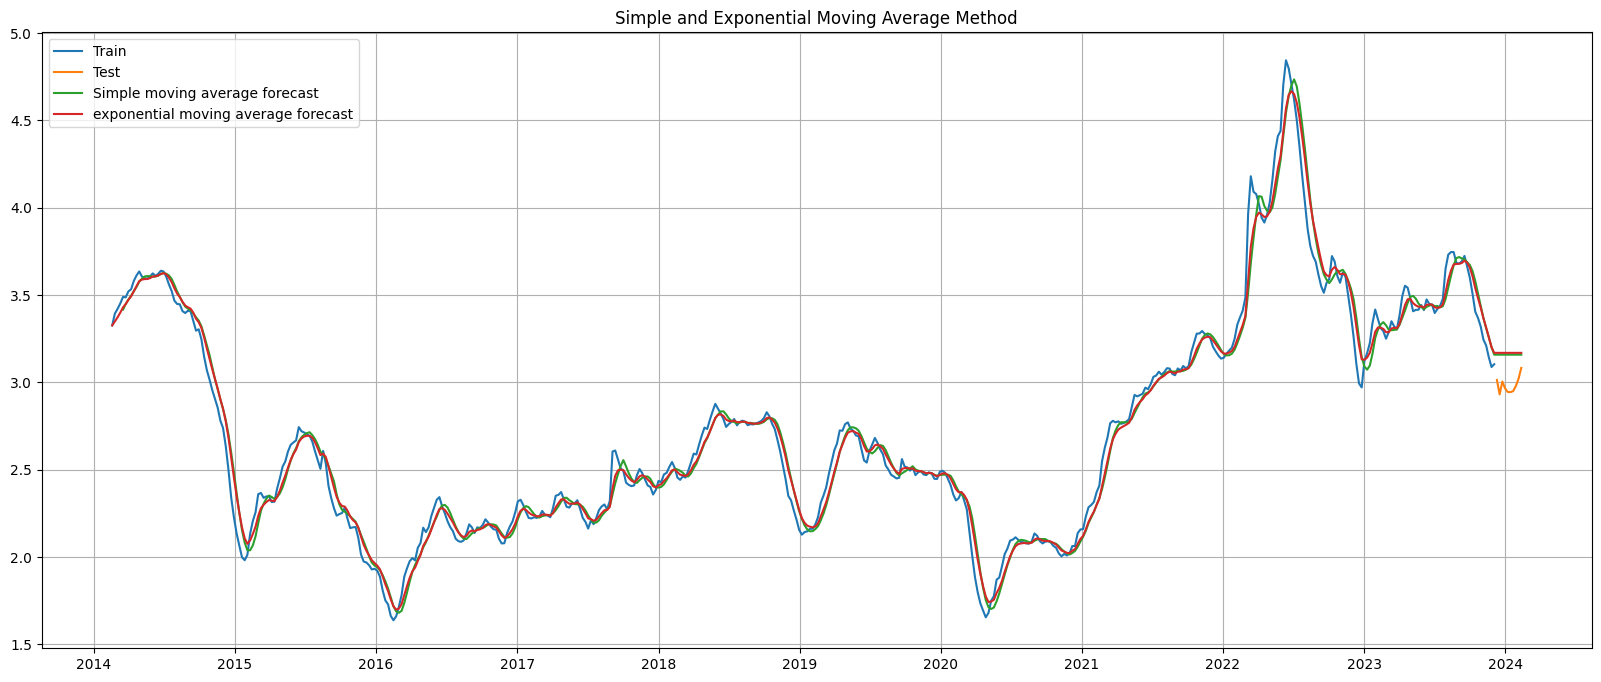

In [42]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.plot(y_hat_ewm['ewm_forecast'], label='exponential moving average forecast')
plt.legend(loc='best')
plt.title('Simple and Exponential Moving Average Method')
plt.show()

### *Calculate RMSE and MAPE*

In [32]:
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(test, y_hat_sma['sma_forecast'][train_len:])).round(2)
mape1 = np.round(np.mean(np.abs(test-y_hat_sma['sma_forecast'][train_len:])/test)*100,2)

results_sma = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape1], 'RMSE': [rmse1]})
results_sma = results_sma[['Method', 'RMSE', 'MAPE']]
results_sma

,Method,RMSE,MAPE
0,Simple moving average forecast,0.18,5.88


In [33]:
rmse2 = np.sqrt(mean_squared_error(test, y_hat_ewm['ewm_forecast'][train_len:])).round(2)
mape2 = np.round(np.mean(np.abs(test-y_hat_ewm['ewm_forecast'][train_len:])/test)*100,2)

results_sma = pd.DataFrame({'Method':['Exponential moving average forecast'], 'MAPE': [mape2], 'RMSE': [rmse2]})
results_ewm = results_sma[['Method', 'RMSE', 'MAPE']]
results_ewm

,Method,RMSE,MAPE
0,Exponential moving average forecast,0.19,6.23


# Time Series Forecasting using ARIMA

### 20. Conduct the Augmented Dickey Fuller test (ADF Test) to determine if the time series it’s stationary, using a significance level of 0.05 

In [73]:
#Create new dataframe with GASREGCOVW as target variable and index Date
close = df['GASREGCOVW']
close

DATE
2014-02-17    3.326
2014-02-24    3.394
2014-03-03    3.421
2014-03-10    3.452
2014-03-17    3.489
              ...  
2024-01-15    2.944
2024-01-22    2.950
2024-01-29    2.979
2024-02-05    3.021
2024-02-12    3.083
Name: GASREGCOVW, Length: 522, dtype: float64

In [74]:
result = adfuller(close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.412058
p-value: 0.138362


* If the P Value is greater than 0.05 in our example, we proceed with determining the order of differencing.

In [79]:
close_diff = df['GASREGCOVW'].diff().dropna()

In [80]:
result2 = adfuller(close_diff)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

ADF Statistic: -8.725789
p-value: 0.000000


### 21. Difference (1st and 2nd order) the series and see how the autocorrelation plot looks like. 

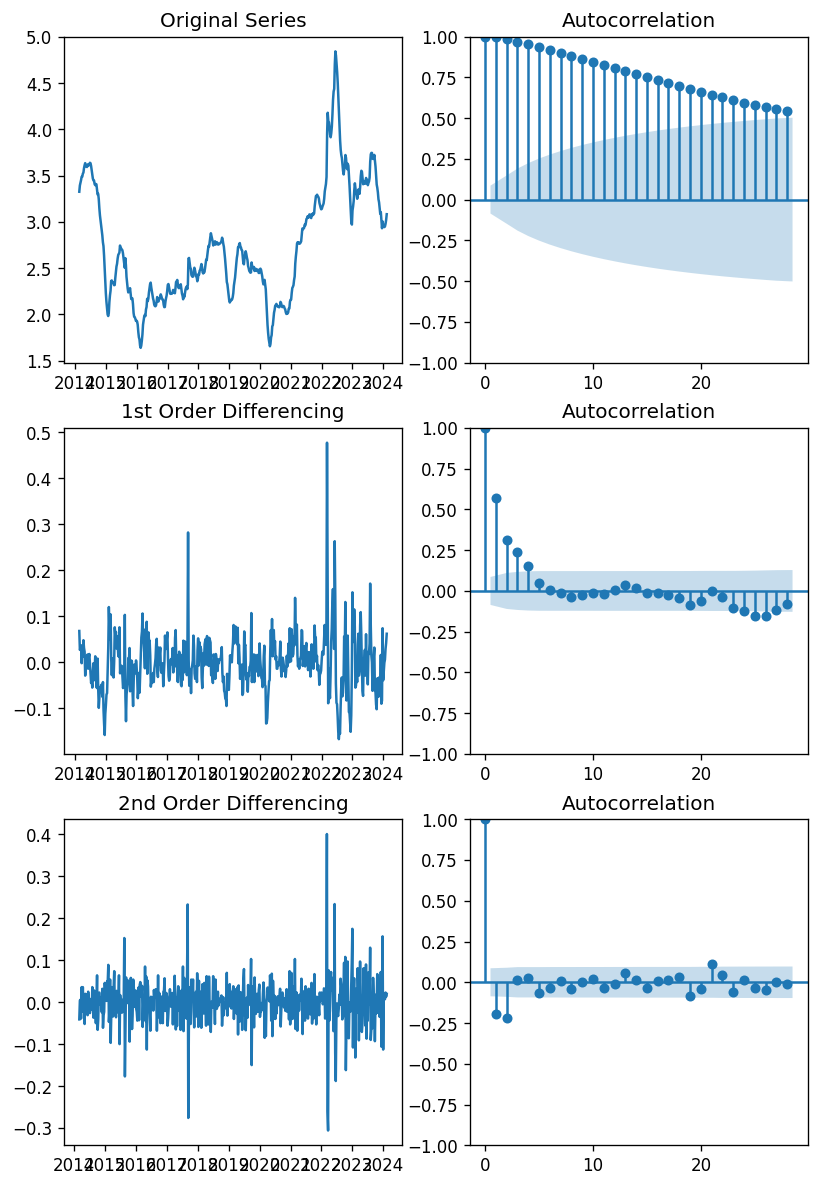

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(8,12), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df['GASREGCOVW']); axes[0, 0].set_title('Original Series')
plot_acf(df['GASREGCOVW'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['GASREGCOVW'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['GASREGCOVW'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['GASREGCOVW'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['GASREGCOVW'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## 22. Find the optimal ARIMA model using Out-of-Time Cross validation: 

* a. Create training and testing datasets using 85% and 15% respectively 

In [88]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(close_diff, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             GASREGCOVW   No. Observations:                  521
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 830.036
Date:                Fri, 23 Feb 2024   AIC                          -1654.072
Time:                        08:28:42   BIC                          -1641.311
Sample:                    02-24-2014   HQIC                         -1649.073
                         - 02-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5757      0.028     20.369      0.000       0.520       0.631
ma.L1         -0.9998      0.123     -8.140      0.000      -1.241      -0.759
sigma2         0.0024      0.000      9.114      0.0

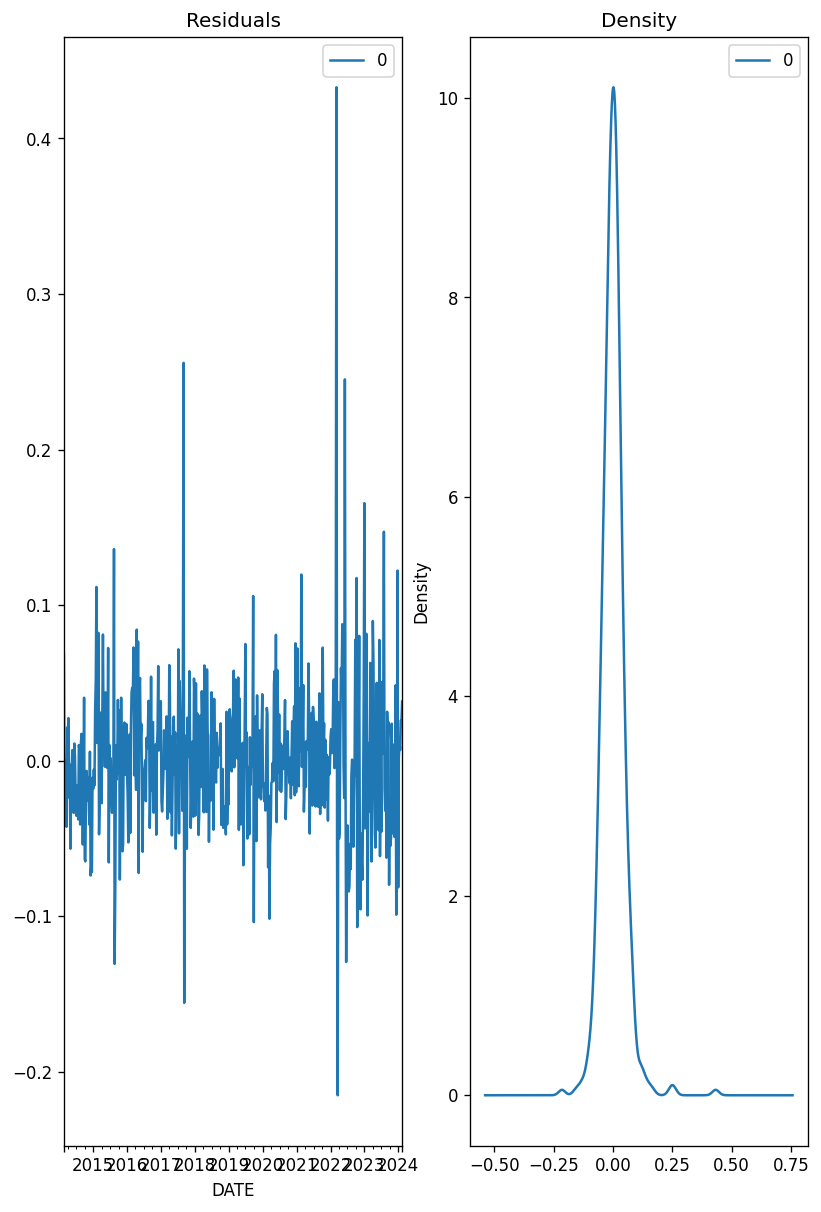

In [93]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

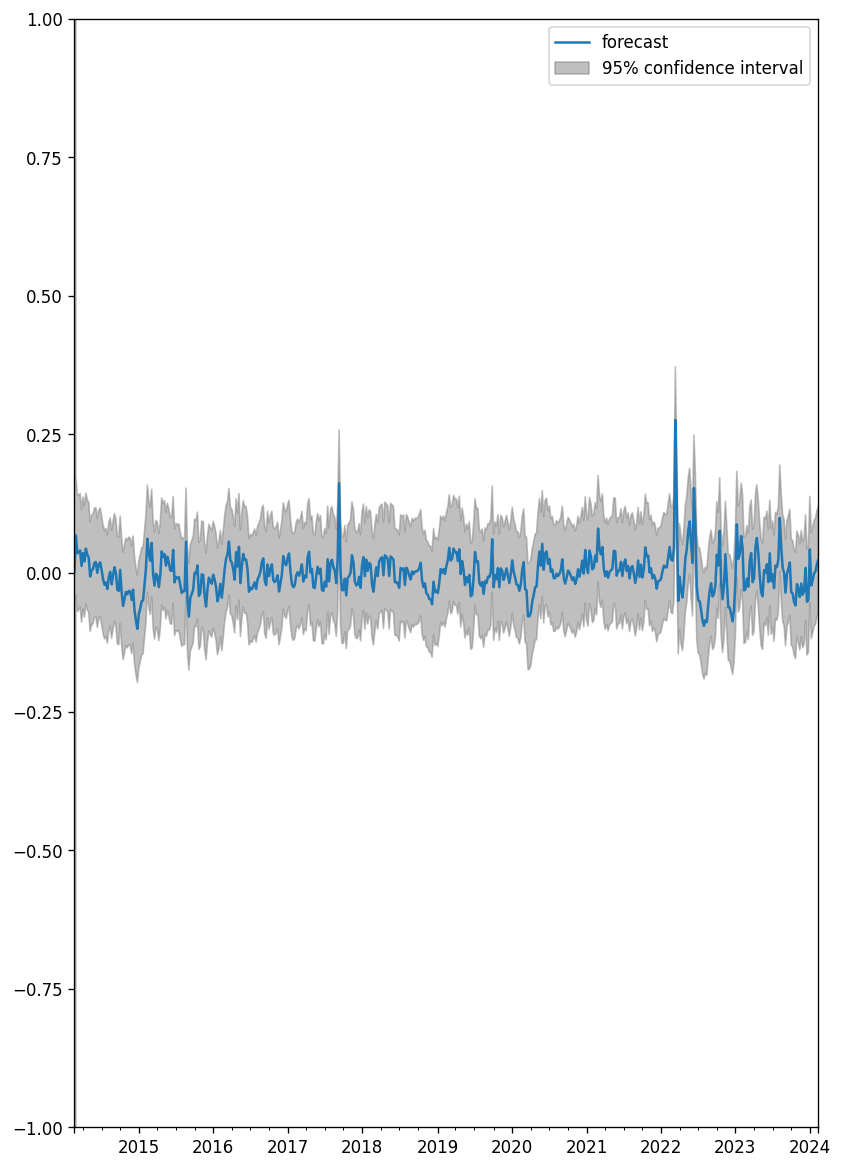

In [96]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# model_fit.plot_predict(dynamic=False)
# plt.show()

# fig, ax = plt.subplots()

plot_predict(model_fit,dynamic=False)
plt.ylim(-1, 1)
plt.show()

* Create Training and Test 
* *train = df['Adj Close'][:85]*
* *test = df['Adj Close'][85:]*

In [105]:
# Create Training and Test
train = df['GASREGCOVW'][:85]
test = df['GASREGCOVW'][85:]

C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


C:\Users\joakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


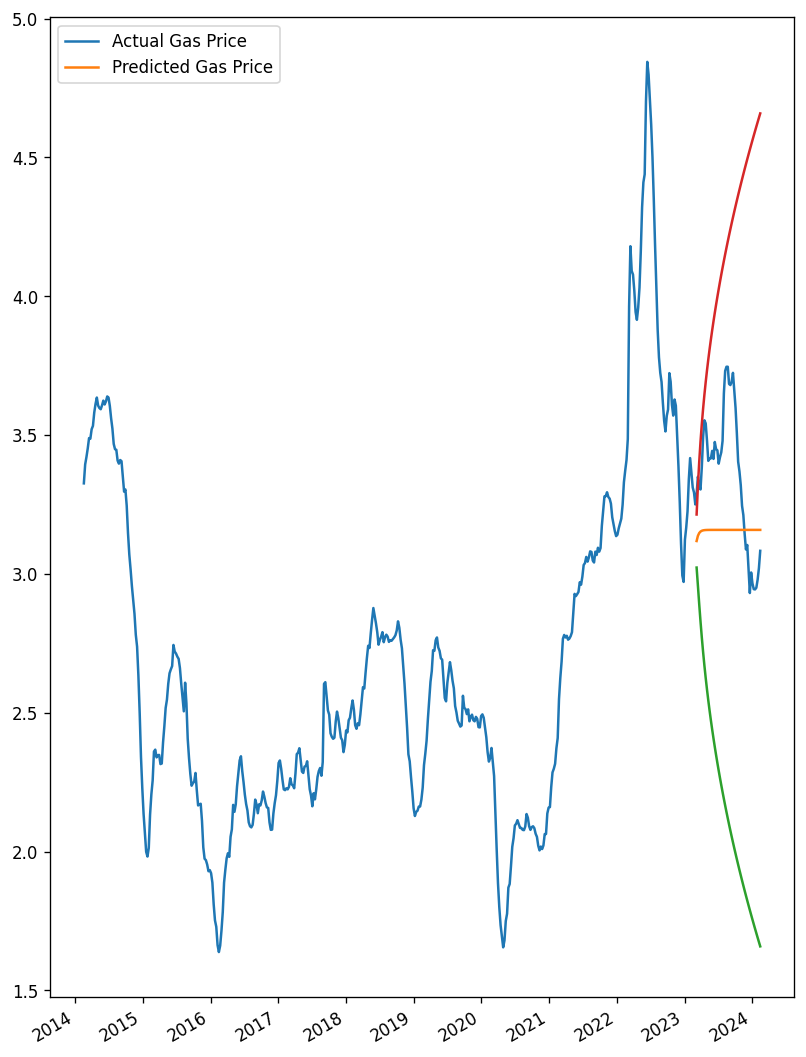

In [122]:
df1 = df['GASREGCOVW']
total = len(df1)
future = 50
hist = total - future

model = ARIMA(df1, order=(1,1,1))
fitted = model.fit()

result = fitted.forecast(future, alpha =0.05)  
conf_ins = fitted.get_forecast(future).summary_frame() # 95% conf
ind = df.index

fig, ax = plt.subplots()
ax.plot(ind, df['GASREGCOVW'].values, label='Actual Gas Price')
ax.plot(ind[hist:], result,label='Predicted Gas Price')
ax.plot(ind[hist:], conf_ins['mean_ci_lower'])
ax.plot(ind[hist:], conf_ins['mean_ci_upper'])
# ax.plot(train, label='training')
# ax.plot(test, label='testing')
ax.legend()
fig.autofmt_xdate()
plt.show()

In [123]:
conf_ins

GASREGCOVW,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-02-19,3.118276,0.048736,3.022755,3.213798
2024-02-26,3.137049,0.091625,2.957468,3.316630
2024-03-04,3.147039,0.130511,2.891242,3.402836
2024-03-11,3.152355,0.165096,2.828773,3.475937
2024-03-18,3.155184,0.195904,2.771219,3.539149
2024-03-25,3.156689,0.223592,2.718457,3.594922
2024-04-01,3.157490,0.248748,2.669954,3.645027
2024-04-08,3.157917,0.271847,2.625107,3.690727
2024-04-15,3.158144,0.293262,2.583361,3.732926
2024-04-22,3.158264,0.313281,2.544244,3.772284


### b. Install and import library pmdarima 

In [124]:
!pip install pmdarima

### c. Find the optimal ARIMA model parameters (p,d,q) using auto_arima. Use stepwise=True, ADF test (test= ‘adf’), max ‘p’ value = 4, max ‘q’ value = 4, and let the model determine ‘d

In [129]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())
# Change stepwise = True or false, using false will make is check all combinations and might take time.

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1661.218, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1458.423, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1662.829, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1627.024, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1460.391, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1661.077, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1661.144, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1664.829, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1663.076, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1663.217, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1629.012, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1663.143, Time=0.34 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.446 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   

### 23. Plot model diagnostics (std residuals, histogram, normal q-q and correlogram) 

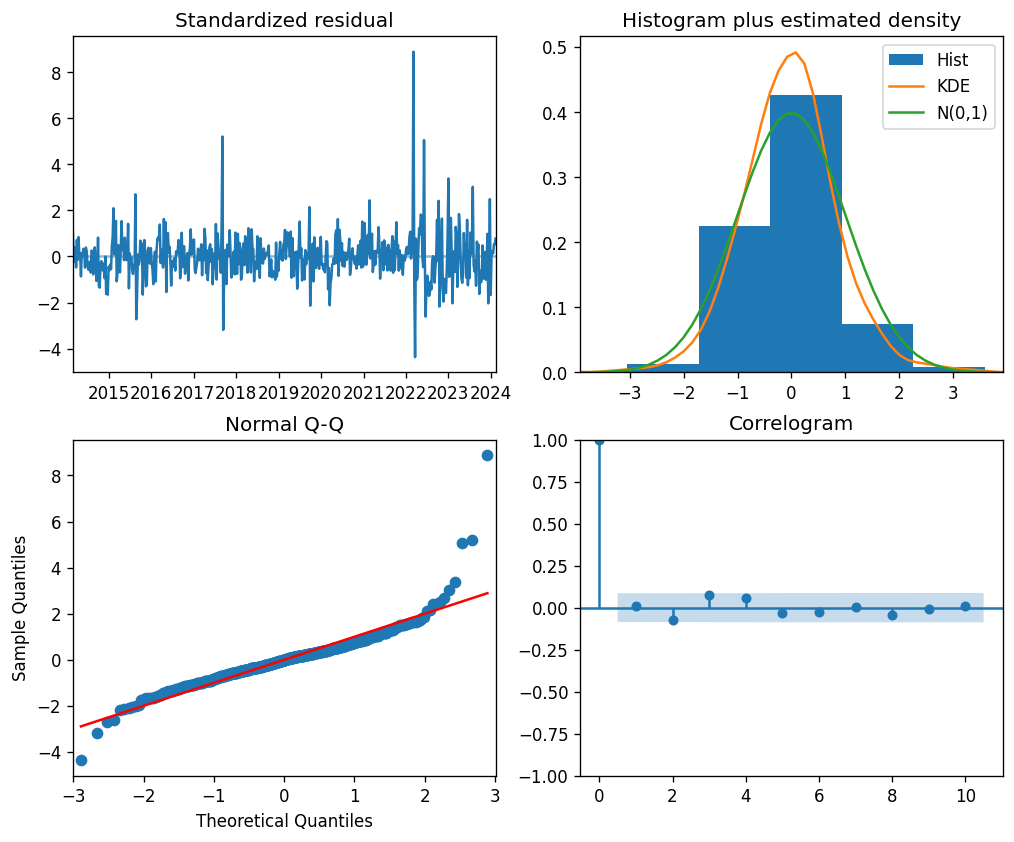

In [130]:
model.plot_diagnostics(figsize=(10,8))
plt.show()